# W/δ Pre-flight Charts

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from atmosphere import Atmosphere

atm = Atmosphere()

In [ ]:
### Aircraft Parameters
Ws = 11900  # Standard Aircraft Weight [lbs]
ZFW = 8900  # Zero Fuel Weight [lbs]
start_fuel = 4743  # Starting Fuel Weight [lbs]

fuel_flow = 1800  # Fuel Flow [lbs/hr] 15Kft
# fuel_flow = 1400  # Fuel Flow [lbs/hr] 25Kft

### Target Parameters
tgt_alt = 15000  # Target Altitude [ft]
# tgt_alt = 25000  # Target Altitude [ft]
delta = atm.get_std_delta(tgt_alt)  # Standard Atmosphere Delta [lb/ft^3]
w_d = Ws / delta

# Calculate Targeted Calibrated Altitude vs Gross Weight
fuel_range = np.arange(0, start_fuel + 100, 100)
df = pd.DataFrame(fuel_range, columns=["fuel_remaining_lbs"])
df["gross_weight_lbs"] = ZFW + df["fuel_remaining_lbs"]
df["required_delta"] = df["gross_weight_lbs"] / w_d
df["ideal_altitude_ft"] = df["required_delta"].apply(atm.get_h_from_delta)
df["-2% Altitude"] = df["ideal_altitude_ft"] * 0.98
df["+2% Altitude"] = df["ideal_altitude_ft"] * 1.02

# Calculate Time in Band
df["+2% Altitude_delta"] = df["+2% Altitude"].apply(atm.get_std_delta)
df["-2% Altitude_delta"] = df["-2% Altitude"].apply(atm.get_std_delta)
df["+2% Altitude_fuel_remaining"] = (df["+2% Altitude_delta"] * w_d) - ZFW
df["-2% Altitude_fuel_remaining"] = (df["-2% Altitude_delta"] * w_d) - ZFW
df["time_in_band"] = (
    (df["-2% Altitude_fuel_remaining"] - df["+2% Altitude_fuel_remaining"]) / fuel_flow
) * 60
df

,fuel_remaining_lbs,gross_weight_lbs,required_delta,ideal_altitude_ft,-2% Altitude,+2% Altitude,+2% Altitude_delta,-2% Altitude_delta,+2% Altitude_fuel_remaining,-2% Altitude_fuel_remaining,time_in_band
0,0,8900,0.422070,22013.765917,21573.490599,22454.041235,0.414217,0.430043,-165.596228,168.129321,11.124185
1,100,9000,0.426812,21751.095698,21316.073784,22186.117612,0.418981,0.434761,-65.124963,267.615143,11.091337
2,200,9100,0.431554,21490.778214,21060.962650,21920.593779,0.423747,0.439478,35.367638,367.079990,11.057078
3,300,9200,0.436297,21232.766881,20808.111543,21657.422219,0.428514,0.444194,135.881299,466.524140,11.021428
4,400,9300,0.441039,20977.016531,20557.476201,21396.556862,0.433281,0.448909,236.415753,565.947864,10.984404
5,500,9400,0.445782,20723.483357,20309.013690,21137.953024,0.438050,0.453623,336.970735,665.351427,10.946023
6,600,9500,0.450524,20472.124853,20062.682356,20881.567350,0.442820,0.458336,437.545990,764.735085,10.906303
7,700,9600,0.455266,20222.899767,19818.441772,20627.357763,0.447590,0.463048,538.141268,864.099092,10.865261
8,800,9700,0.460009,19975.768049,19576.252688,20375.283410,0.452362,0.467760,638.756321,963.443694,10.822912
9,900,9800,0.464751,19730.690804,19336.076988,20125.304620,0.457134,0.472470,739.390913,1062.769131,10.779274


In [ ]:
# Create a new DataFrame with the specified columns
df_selected = df[["fuel_remaining_lbs", "+2% Altitude", "ideal_altitude_ft", "-2% Altitude", "time_in_band"]]
df_selected = df_selected.sort_values(by="fuel_remaining_lbs", ascending=False)
df_selected[["+2% Altitude", "ideal_altitude_ft", "-2% Altitude", "time_in_band"]] = df_selected[["+2% Altitude", "ideal_altitude_ft", "-2% Altitude", "time_in_band"]].round()

w_d_rounded = int(w_d)
df_selected.columns = ["fuel", "+2%", "ideal", "-2%", "mins"]
df_selected.to_excel(f"./output/tables/inflight_wd_{w_d_rounded}.xlsx", index=False)

# Display the new DataFrame
df_selected

,fuel,+2%,ideal,-2%,mins
48,4800,11686.0,11457.0,11228.0,8.0
47,4700,11876.0,11644.0,11411.0,8.0
46,4600,12068.0,11831.0,11595.0,8.0
45,4500,12261.0,12020.0,11780.0,8.0
44,4400,12454.0,12210.0,11966.0,9.0
43,4300,12649.0,12401.0,12153.0,9.0
42,4200,12846.0,12594.0,12342.0,9.0
41,4100,13043.0,12787.0,12531.0,9.0
40,4000,13242.0,12982.0,12722.0,9.0
39,3900,13442.0,13178.0,12914.0,9.0


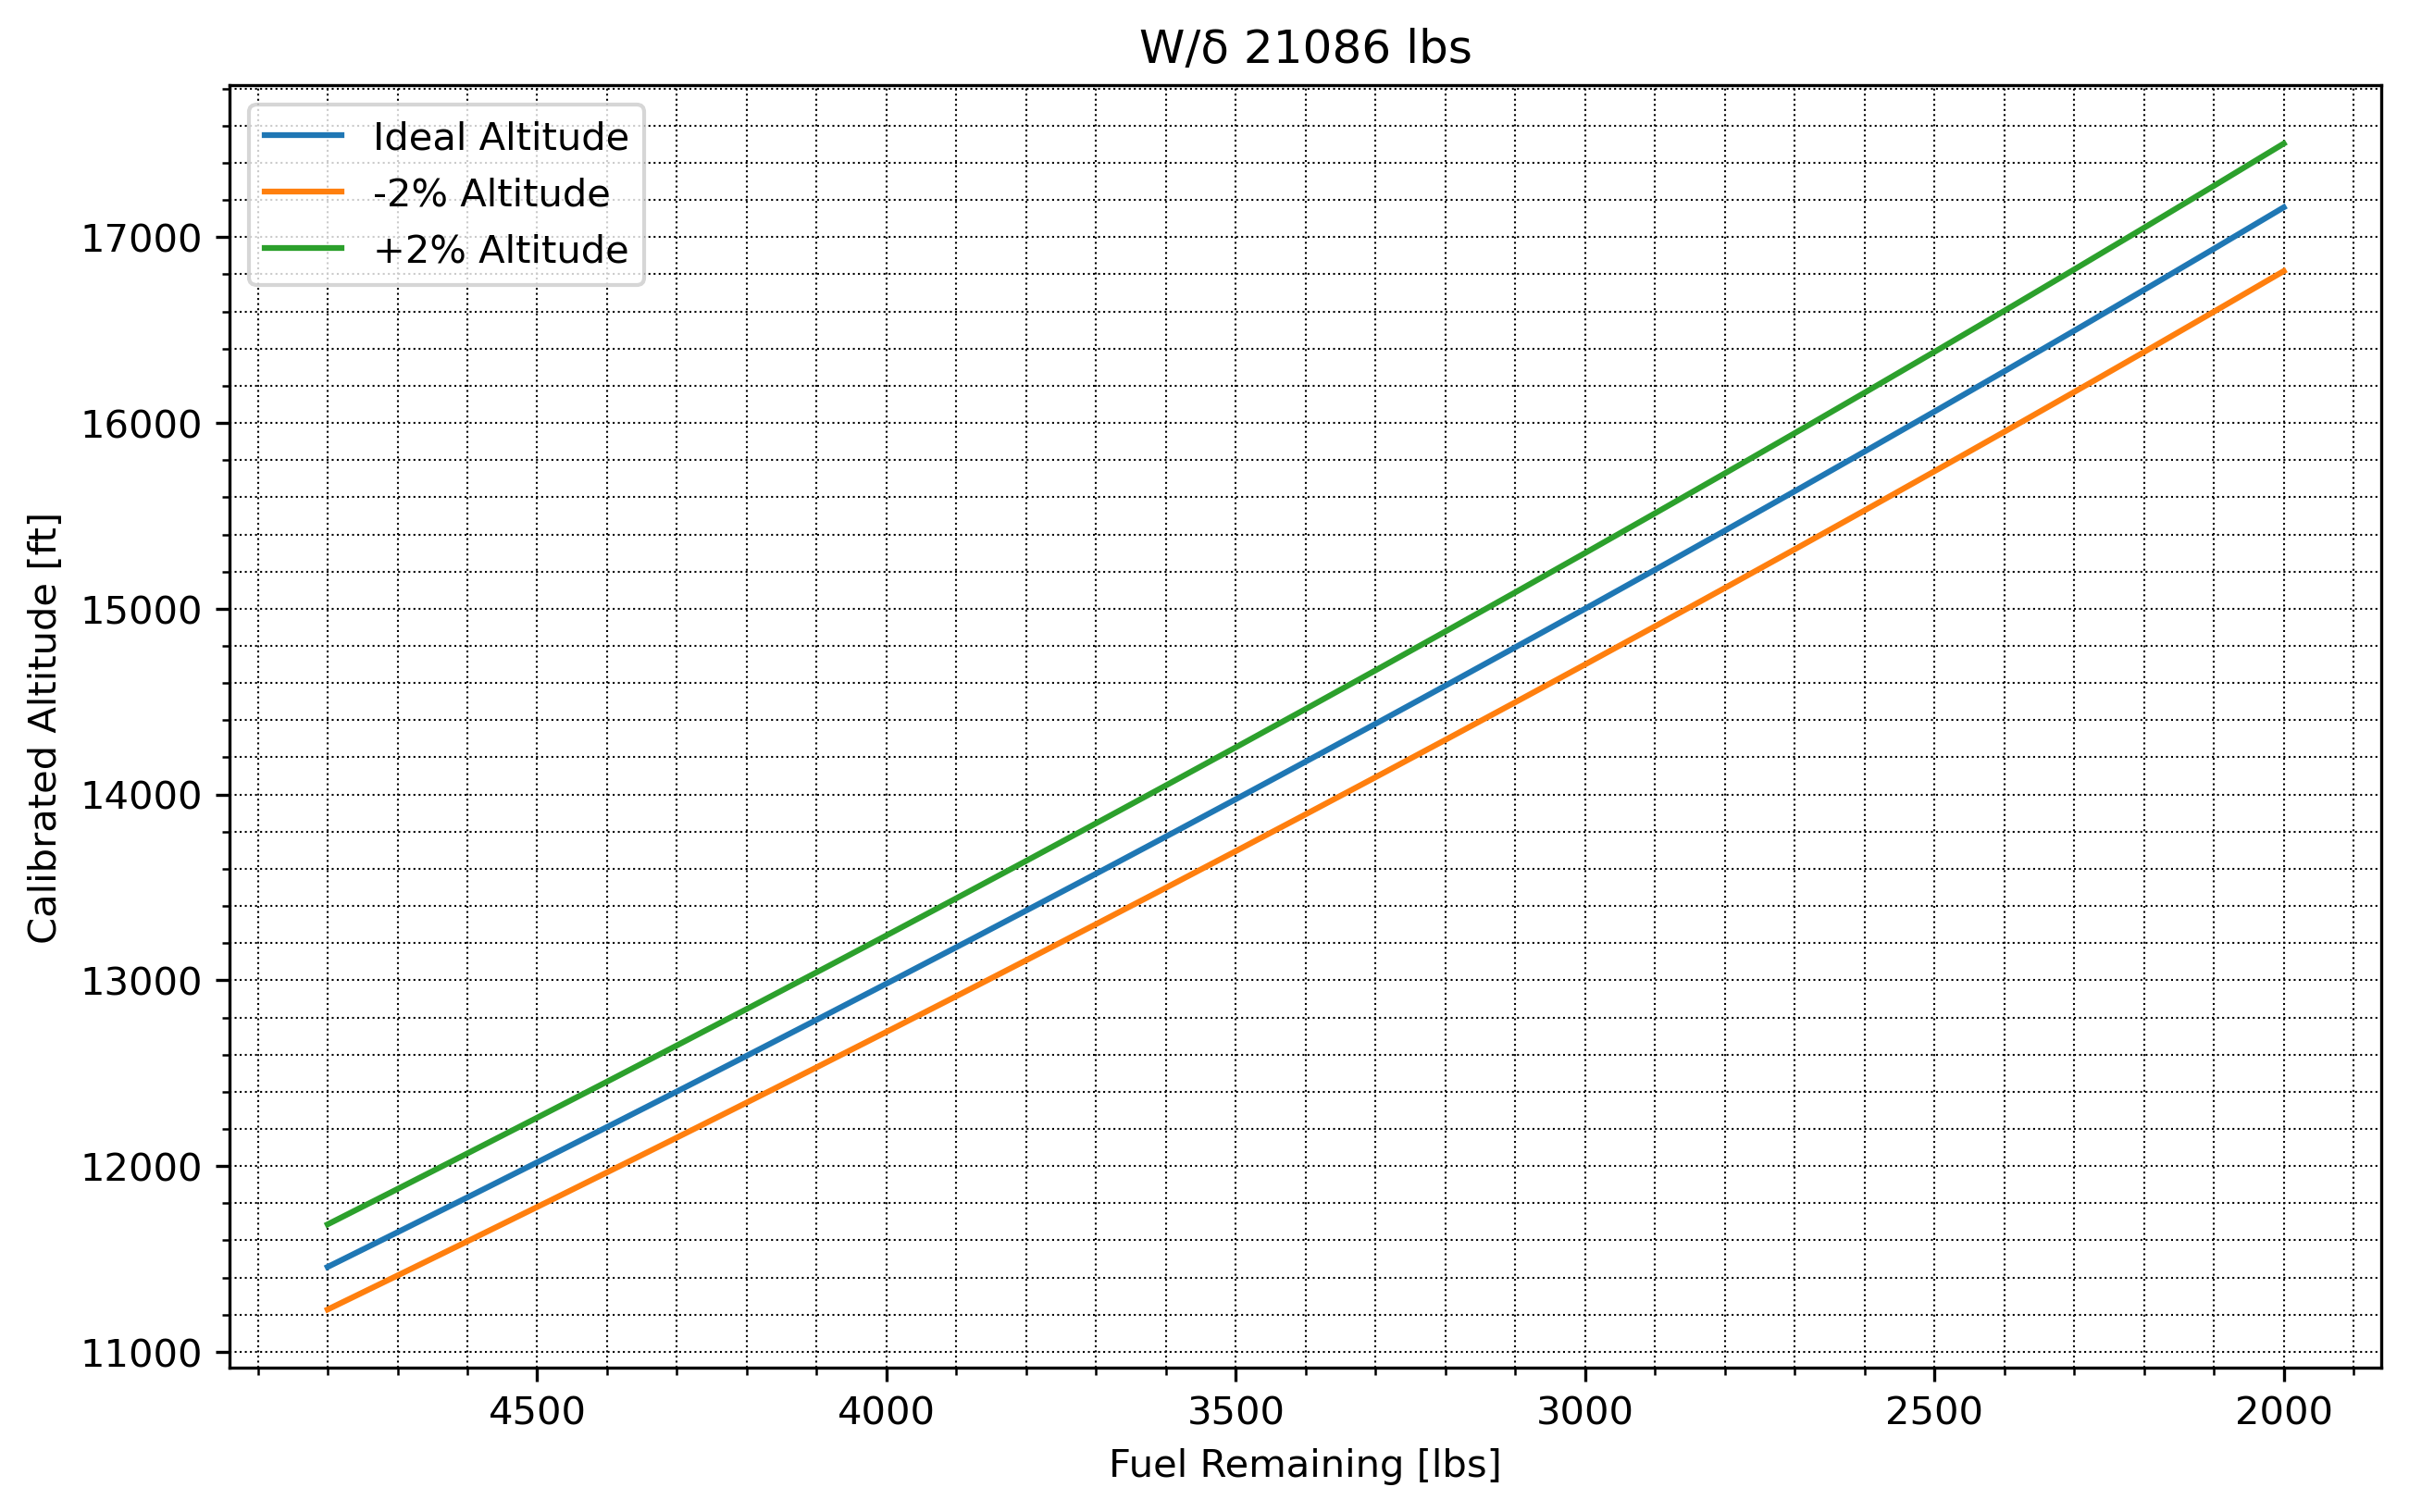

In [ ]:
# Filter the dataframe for fuel values between 3000 and 5000
# df_filtered = df[(df["fuel_remaining_lbs"] >= 0) & (df["fuel_remaining_lbs"] <= start_fuel)]
df_filtered = df[
    (df["fuel_remaining_lbs"] >= 2000) & (df["fuel_remaining_lbs"] <= 5000)
]

plt.figure(figsize=(10, 6), dpi=300)

plt.plot(
    df_filtered["fuel_remaining_lbs"],
    df_filtered["ideal_altitude_ft"],
    label="Ideal Altitude",
)
plt.plot(
    df_filtered["fuel_remaining_lbs"], df_filtered["-2% Altitude"], label="-2% Altitude"
)
plt.plot(
    df_filtered["fuel_remaining_lbs"], df_filtered["+2% Altitude"], label="+2% Altitude"
)
plt.xlabel("Fuel Remaining [lbs]")
plt.ylabel("Calibrated Altitude [ft]")
plt.title(f"W/δ {w_d_rounded} lbs")
plt.legend()
plt.grid(True)
plt.minorticks_on()
plt.grid(which="both", linestyle=":", linewidth="0.5", color="black")
plt.gca().invert_xaxis()  # Invert the x-axis

# Save the plot
plt.savefig(f"./output/plots/w_d_{w_d_rounded}.png")

plt.show()

In [62]:
# For manual calculation if required
def calculate_ideal_altitude(current_fuel):
    gross_weight = ZFW + current_fuel
    required_delta = gross_weight / w_d
    ideal_altitude = atm.get_h_from_delta(required_delta)
    return ideal_altitude


# calculate_ideal_altitude(6000)
# print(f"Ideal Altitude: {calculate_ideal_altitude(6000)}")